In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Text classification  with Bidirectional LSTM

# Import Required Packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the dataset from the folder
data = pd.read_json("/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json", lines=True)
data.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [4]:
# Extract the columns of dataframe for classification purpose
contents = np.array(data['headline'])
lab = np.array(data['is_sarcastic'])

# splitting the data for training and testing purpose
# 80% for training and 20% for testing
percent = 0.8
NUM = int(percent * len(contents))

train_sen, test_sen = contents[:NUM], contents[NUM:]
train_lab, test_lab = lab[:NUM], lab[NUM:]


In [5]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
embedding_dim = 32
max_length = 100
trunc_type='post'  # truncation purpose
oov_tok = "<OOV>" # out of vocabulary token

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sen)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sen)
train_padded = pad_sequences(train_seqs, maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

In [7]:
# Here is our sequential model with embedding layer, Bidirectional LongShortTermMemory, and two dense layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

##compile the model with loss function, optimizer and metrics
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
Epochs = 100
##train the model with training and validation set
history = model.fit(
    train_padded,   #training sequence
    train_lab, # training labels
    epochs=Epochs,
    validation_data=(test_padded, test_lab) # test data
    )
# save the model
model.save('trained_model.h5') # save the model

Epoch 1/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.7364 - loss: 0.1686 - val_accuracy: 0.8525 - val_loss: 0.1078
Epoch 2/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9200 - loss: 0.0625 - val_accuracy: 0.8502 - val_loss: 0.1097
Epoch 3/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9430 - loss: 0.0458 - val_accuracy: 0.8437 - val_loss: 0.1190
Epoch 4/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9667 - loss: 0.0280 - val_accuracy: 0.8441 - val_loss: 0.1251
Epoch 5/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9390 - loss: 0.0468 - val_accuracy: 0.8023 - val_loss: 0.1387
Epoch 6/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9402 - loss: 0.0474 - val_accuracy: 0.8345 - val_loss: 0.1311
Epoch 7/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9693 - loss: 0.0259 - val_accuracy: 0.8325 - val_loss: 0.1352
Epoch 8/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9745 - loss: 0

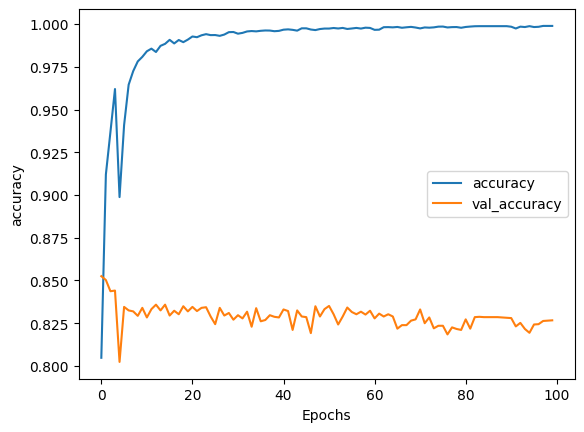

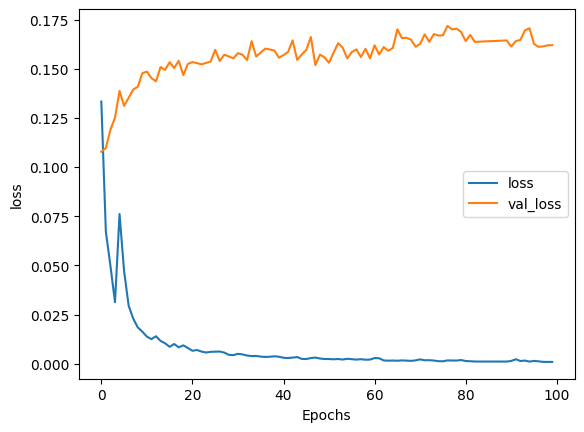

In [9]:

##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.legend([metric, 'val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")

In [10]:
new_sen = ["top snake handler leaves sinking huckabee campaign"]
sequences = tokenizer.texts_to_sequences(new_sen)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
##print the classification score
x = model.predict(padded_seqs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
